<a href="https://colab.research.google.com/github/iyushanand/AI_pair_programmer/blob/main/cat_vs_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [29]:
!chmod 600 /root/.kaggle/kaggle.json


In [30]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
!unzip -q cat-and-dog.zip -d ./data  # unzipping the files


replace ./data/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [32]:
import tensorflow as tf # imported necesary files
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [33]:
# keras use generators and divides data to bacthes , for less time
# from the documentation of keras
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/data/training_set/training_set' ,
    labels="inferred",
    label_mode="int",# gives 0 and 1 to cats and dogs
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/data/test_set/test_set' ,
    labels="inferred",
    label_mode="int",# gives 0 and 1 to cats and dogs
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

# data preparation done , using the image_dataset_from_directory

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [34]:
# Neural networks learn faster and more stably when input data is normalized.
# normalisation
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label
# putting
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [35]:
# Creating our CNN model -- > Conv2D+Maxpool x 3 --> Flatten-->Dense+Dropoutx3
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds) # fitted above defined data here

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.5677 - loss: 0.7356 - val_accuracy: 0.6050 - val_loss: 0.6640
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6496 - loss: 0.6333 - val_accuracy: 0.6915 - val_loss: 0.5853
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7374 - loss: 0.5287 - val_accuracy: 0.6995 - val_loss: 0.6000
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.7885 - loss: 0.4509 - val_accuracy: 0.7380 - val_loss: 0.5853
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8583 - loss: 0.3269 - val_accuracy: 0.7197 - val_loss: 0.7174
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9190 - loss: 0.2041 - val_accuracy: 0.7252 - val_loss: 1.0701
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9419 - loss: 0.1515 - val_accuracy: 0.7064 - val_loss: 1.1872
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9574 - loss: 0.1198 - 

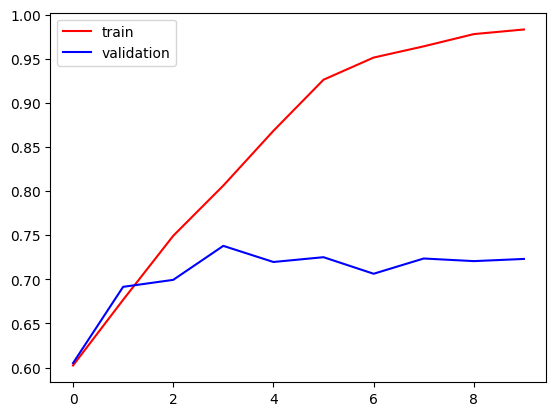

In [38]:
# training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


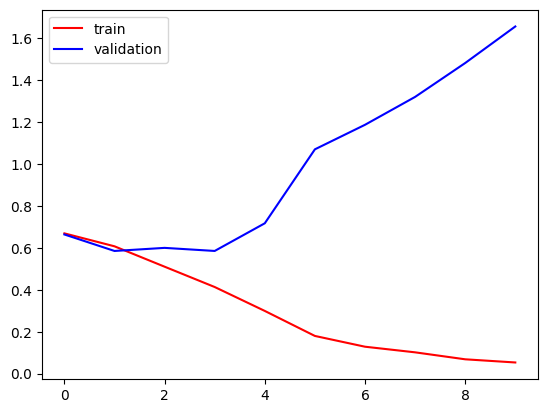

In [39]:
# training and accuracy loss graph
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [40]:
# if there is overfiting ,  but there is not
# add more data
# data augmentation -> generate more data existing data
# L1/L2 Regulizer
# Drop Out
# Batch Norm
# Reduce Complexity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Raw prediction: [[1.]]
Predicted class (0=cat,1=dog): 1


/tmp/ipython-input-2262835391.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(prediction[0] > 0.5)


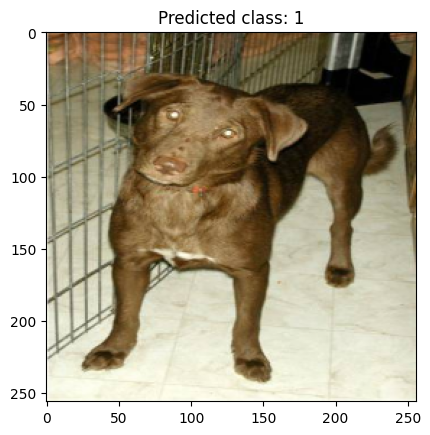

In [41]:
# predicting on our images
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
test_img = cv2.imread('/content/data/training_set/training_set/dogs/dog.1.jpg')

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize to model input
test_img = cv2.resize(test_img, (256,256))

# Normalize pixels to [0,1]
test_input = test_img / 255.0

# Add batch dimension
test_input = np.expand_dims(test_input, axis=0)

# Predict
prediction = model.predict(test_input)
print("Raw prediction:", prediction)

# Convert to class label
pred_label = int(prediction[0] > 0.5)
print("Predicted class (0=cat,1=dog):", pred_label)

# Show image
plt.imshow(test_img)
plt.title(f"Predicted class: {pred_label}")
plt.show()
